In [1]:
library(ggplot2)
library(dplyr)
library(reshape2)
library(lubridate)
#library(gtools)# mixed sort
library(reticulate)# for loading parquet files
pandas <- import("pandas")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
DATA_FOLDER <- "/Users/KAschbacher/desktop/eheart/analysis/bac/redshift_data"
FIGURE_FOLDER <- "/Users/KAschbacher/Dropbox/BACTrack/BACTrack/Manuscript/Tables and Figures/Cohort"
# Pick the 2013 version, program will loop over replace date with other partitions
PARQUET_FILE <- "bac.final_analysis9_2013_2019-08-10.parquet"
PARQUET_PATH <- sprintf('%s/%s', DATA_FOLDER, PARQUET_FILE)
TODAY <- as.character(Sys.Date())

In [3]:
# Tutorial
# https://analyzecore.com/2014/05/31/cohort-analysis-in-r-layer-cake-graph/

In [4]:
# cohort.sum <- data.frame(cohort=c('Cohort01', 'Cohort02', 'Cohort03', 'Cohort04', 'Cohort05', 'Cohort06', 'Cohort07', 'Cohort08', 'Cohort09', 'Cohort10', 'Cohort11', 'Cohort12'),
#  M1=c(270000,0,0,0,0,0,0,0,0,0,0,0),
#  M2=c(85000,275000,0,0,0,0,0,0,0,0,0,0),
#  M3=c(72000,63000,277000,0,0,0,0,0,0,0,0,0),
#  M4=c(52000,42000,76000,361000,0,0,0,0,0,0,0,0),
#  M5=c(50000,45000,60000,80000,288000,0,0,0,0,0,0,0),
#  M6=c(51000,52000,55000,51000,58000,253000,0,0,0,0,0,0),
#  M7=c(51000,69000,48000,45000,42000,54000,272000,0,0,0,0,0),
#  M8=c(46000,85000,77000,41000,38000,37000,74000,352000,0,0,0,0),
#  M9=c(38000,42000,72000,41000,31000,30000,49000,107000,285000,0,0,0),
#  M10=c(39000,38000,45000,33000,34000,34000,46000,83000,69000,279000,0,0),
#  M11=c(38000,42000,31000,32000,26000,28000,43000,82000,51000,87000,282000,0),
#  M12=c(35000,35000,38000,45000,35000,32000,48000,44000,47000,52000,92000,500000))

In [5]:
# #we need to melt data
# cohort.chart <- melt(cohort.sum, id.vars = "cohort")
# colnames(cohort.chart) <- c('cohort', 'month', 'revenue')

# #define palette
# blues <- colorRampPalette(c('lightblue', 'darkblue'))

# #plot data
# p <- ggplot(cohort.chart, aes(x=month, y=revenue, group=cohort))
# p + geom_area(aes(fill = cohort)) +
#  scale_fill_manual(values = blues(nrow(cohort.sum))) +
#  ggtitle('Total revenue by Cohort')

### Load the data

In [6]:
read_parquet <- function(path, columns = NULL) {
    
  path <- path.expand(path)
  path <- normalizePath(path)

  if (!is.null(columns)) columns = as.list(columns)

  xdf <- pandas$read_parquet(path, columns = columns)
  xdf <- as.data.frame(xdf, stringsAsFactors = FALSE)
  dplyr::tbl_df(xdf)
}

# Loop over date range and read all the date-partitioned parquet files into one dataframe

df <- data.frame()
for (i in 2013:2017) {
    new_path <- sub('2013', as.character(i), PARQUET_PATH)
    sprintf ('Loading file %s...', new_path)
    
    #df_temp <- data.frame(y1 = c(1, 2, 3), y2 = c(4, 5, 6))# FOR DEBUGGING
    df_temp <- read_parquet(new_path)
    df <- rbind(df, df_temp)
}

dim(df)
names(df)

[1] 973264    140

[1] "username"                                        
  [2] "bac_level"                                       
  [3] "bac_guess"                                       
  [4] "bac_level_verified_sum"                          
  [5] "photo_count"                                     
  [6] "drinks_count"                                    
  [7] "note"                                            
  [8] "timestamp_gmt"                                   
  [9] "timestamp_converted_to_local"                    
 [10] "timezone"                                        
 [11] "timezone_from_geo"                               
 [12] "latitude"                                        
 [13] "longitude"                                       
 [14] "country"                                         
 [15] "place_name"                                      
 [16] "population"                                      
 [17] "elevation"                                       
 [18] "random_row"                                      
 [19] "n_bacs_measured"                                 
 [20] "zip_code"                                        
 [21] "county"                                          
 [22] "state_code"                                      
 [23] "game"                                            
 [24] "state_game_played"                               
 [25] "winner_state_code"                               
 [26] "loser_state_code"                                
 [27] "in_winning_state"                                
 [28] "in_losing_state"                                 
 [29] "is_game"                                         
 [30] "holiday"                                         
 [31] "culture"                                         
 [32] "culture_id"                                      
 [33] "is_holiday"                                      
 [34] "n_bacs"                                          
 [35] "max_bac"                                         
 [36] "bac_range"                                       
 [37] "date_first_bac"                                  
 [38] "date_last_bac"                                   
 [39] "days_range_engaged"                              
 [40] "n_bac_days"                                      
 [41] "bac_avg_today"                                   
 [42] "bac_avg_lag1"                                    
 [43] "bac_avg_lag2"                                    
 [44] "bac_avg_lag3"                                    
 [45] "bac_avg_lag4"                                    
 [46] "bac_avg_lag5"                                    
 [47] "date_local"                                      
 [48] "hour_local"                                      
 [49] "dow"                                             
 [50] "day_of_week"                                     
 [51] "distance_km"                                     
 [52] "avg_distance_km"                                 
 [53] "min_distance_km"                                 
 [54] "max_distance_km"                                 
 [55] "range_distance_km"                               
 [56] "distance_25q"                                    
 [57] "distance_50q"                                    
 [58] "distance_75q"                                    
 [59] "distance_iqr"                                    
 [60] "distance_coef_disp"                              
 [61] "n_countries"                                     
 [62] "n_states"                                        
 [63] "n_zip_codes"                                     
 [64] "bac_level_25q"                                   
 [65] "bac_level_50q"                                   
 [66] "bac_level_75q"                                   
 [67] "bac_level_iqr"                                   
 [68] "bac_coef_disp"                                   
 [69] "has_note"                                        
 [70] "monitor_content"                                 
 [71] "monit

In [7]:
date_parts <- function(df) {
    # Assign every BrAC recording to a continuous integer representing a combination of the year and month
    tdate <- lubridate::ymd_hms(df$timestamp_gmt)
    df$year <- lubridate::year(tdate)
    df$month <- lubridate::month(tdate)
    # Calculate a continuous index based on year and month, start it at 1
    df$xmonth <- (12*(df$year-2013) + df$month) 
    start <- min(unique(df$xmonth))
    df$xmonth <- df$xmonth - start + 1
    return (df)
}

In [9]:
# Simplify/ optimize
df <- date_parts(df)
df <- df[c("username","timestamp_gmt","bac_level","xmonth")]
dim(df)

[1] 973264      4

### Create Cohorts representing the month-year during which each user joined BACtrack

In [18]:
make_user_df <-function(df) {
    # Find the minimum timestamp for each user.  This is their start_date with BACtrack, which defines "cohort"
    users <- df[c("username","timestamp_gmt")] %>%
        group_by(username) %>%
        slice(which.min(timestamp_gmt))
    
    # Create a consecutive variable reflecting months from 2013-2017
    udate <- lubridate::ymd_hms(users$timestamp_gmt)
    users$cohort_year <- lubridate::year(udate)
    users$cohort_month <- lubridate::month(udate)
    
    # Make continuous cohort variable, starting with 1, but skipping months with no data
    users$cohort <- 12*(users$cohort_year-2013) + users$cohort_month
    users$cohort <- users$cohort - min(users$cohort) + 1
    ### Make 3m cohorts... you don't want too many groups or you can't see them
    users$cohort_3m <- ceiling(users$cohort/3)# groups months 1-3, 4-6, etc... as cohorts
    
    return (users)
}

In [19]:
users <- make_user_df(df)
### QA
nrow(users) == length(unique(users$username))
dim(users)
head(users)

[1] TRUE

[1] 33460     6

username,timestamp_gmt,cohort_year,cohort_month,cohort,cohort_3m
bc.mk.Q,2016-09-01 23:39:00,2016,9,41,14
jQQ iSWQmQGkim,2016-12-14 23:39:00,2016,12,44,15
RmQkcjj60,2016-12-29 03:26:00,2016,12,44,15
____µ__Ü____âÜÑ,2017-01-06 05:38:00,2017,1,45,15
_‰_µ__,2014-01-25 00:16:00,2014,1,9,3
_mckbaQj_,2013-05-05 00:50:00,2013,5,1,1


### Merge users back into main df, to have cohort and consecutive time in the same dataframe

In [20]:
user_cols = c("username","cohort","cohort_3m")
m <- merge(df, users[user_cols], by.x="username", by.y="username")
dim(m)
head(m)
#tail(m)

[1] 973264      6

username,timestamp_gmt,bac_level,xmonth,cohort,cohort_3m
bc.mk.Q,2016-09-16 20:15:00,0.000,41,41,14
bc.mk.Q,2016-09-16 20:28:00,0.017,41,41,14
bc.mk.Q,2016-09-01 23:40:00,0.083,41,41,14
bc.mk.Q,2016-09-16 20:21:00,0.333,41,41,14
bc.mk.Q,2016-09-16 20:20:00,0.000,41,41,14
bc.mk.Q,2016-09-01 23:39:00,0.084,41,41,14


### Aggregate by cohort 
<p>(each user belongs to a cohort) and xmonth (each timestamp-based BrAC belongs to a month in a consecutive sequence)</p>

In [23]:
make_cohort_df <-function(m) {
    m$bac_level <- as.numeric(m$bac_level)
    cohort_df <- m %>%
        group_by(cohort_3m, xmonth) %>%
        tally()

    cohort_df[order("cohort_3m", "xmonth"),]

    ### QA steps
    #dim(cohort_df)
    #head(cohort_df)
    #unique(cohort_df$cohort_3m)
    
    # pivot
    cohort_df_p <- reshape2::dcast(cohort_df, cohort_3m ~ xmonth, value.var="n")
    
    # Fill in missing data
    cohort_df_p[is.na(cohort_df_p)] <- 0
    
    return(cohort_df_p)
}

In [25]:
# 7 and 13 are missing here too
cohort_df <- make_cohort_df(m)
unique(cohort_df$cohort_3m) 
head(cohort_df)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

cohort_3m,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,50
1,2986,3079,3675,2359,1486,1317,1428,1584,1599,...,366,224,171,155,155,86,2,0,0,0
2,0,0,0,1540,2200,5474,3160,2087,1910,...,376,307,231,175,138,215,9,13,11,0
3,0,0,0,0,0,0,2182,8290,9268,...,875,719,474,547,460,567,37,18,27,0
4,0,0,0,0,0,0,0,0,0,...,2654,1910,1641,1480,984,845,14,10,3,0
5,0,0,0,0,0,0,0,0,0,...,3158,2564,2161,1634,1453,1391,53,49,52,0
6,0,0,0,0,0,0,0,0,0,...,230,173,80,74,47,72,0,0,0,0


### Prepare df for graphing (as per the tutorial)

In [33]:
prepare_data_to_graph <- function(df) {
    # (data now look like they are the same as pre-pivot, except we have 0's --> i don't know whether you actually need those)
    cohort.chart <- melt(df, id.vars = "cohort_3m")
    colnames(cohort.chart) <- c('cohort', 'month', 'n')

    # Prepare data to be read by chart below
    cohort.chart$n <- as.numeric(cohort.chart$n)
    cohort.chart$month <- as.numeric(cohort.chart$month)
    cohort.chart$cohort <- as.factor(cohort.chart$cohort)
    return (cohort.chart)
}

cohort.chart <- prepare_data_to_graph(cohort_df)

### Hacks to fill in missing data

In [57]:
# Takes data from a prior month and carries it forward to a month where data is totally or mostly missing

carry_forward <- function(cohort.chart, from_row, to_row) {
    # grab the data we want to carry forward, and make a new dataframe without the data to get rid of
    mfrom <-subset(cohort.chart, cohort.chart$month == from_row)
    new <- subset(cohort.chart, cohort.chart$month!= to_row)
    # update the month number to where we want to carry forward the data
    mfrom$month <- to_row
    # bind new data on
    rbind(new, mfrom)
}

cohort.chart <- carry_forward(cohort.chart, 15, 16)
cohort.chart <- carry_forward(cohort.chart, 15, 17)
cohort.chart <- carry_forward(cohort.chart, 29, 30)
cohort.chart <- carry_forward(cohort.chart, 29, 31)

### Make Cohort Analysis Graph

[1] "/Users/KAschbacher/Dropbox/BACTrack/BACTrack/Manuscript/Tables and Figures/Cohort/BrAC_Cohort_Analysis_2019-08-12.png"


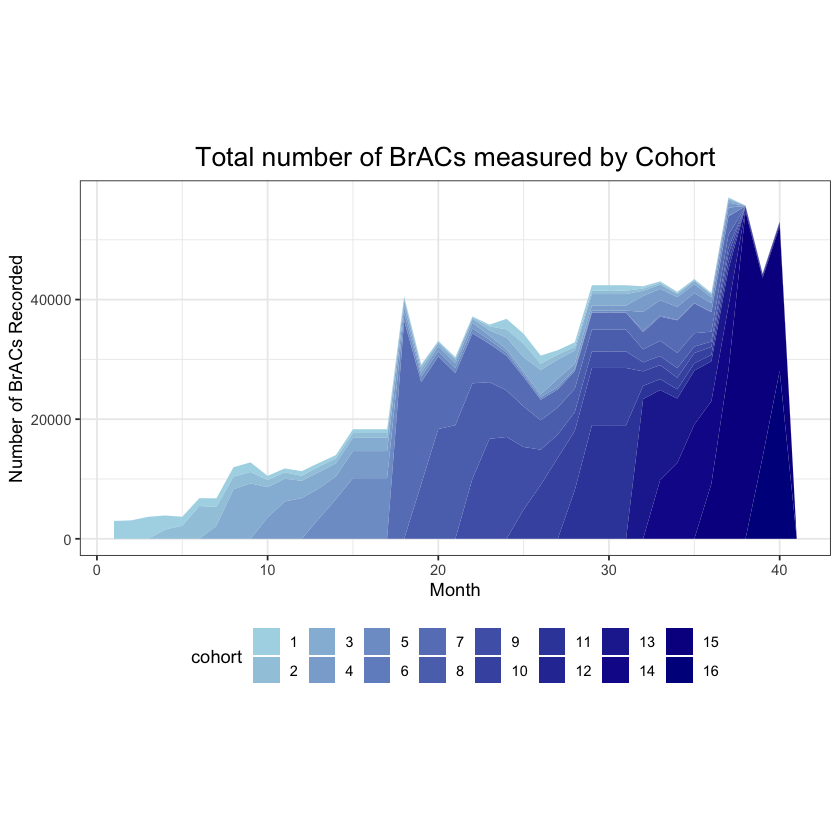

In [79]:
#define palette & aspect ratio
blues <- colorRampPalette(c('lightblue', 'darkblue'))
cohort.chart$cohort <- as.factor(cohort.chart$cohort)# must be type factor for this graph to work
ar <- .5#aspect_ratio

# Define filepath to save
filepath <-sprintf('%s/BrAC_Cohort_Analysis_%s.png', FIGURE_FOLDER, TODAY)
print (filepath)

#plot data
p <- ggplot(cohort.chart, aes(x=month, y=n, group=cohort))
    p + geom_area(aes(fill = cohort)) +
     scale_fill_manual(values = blues(nrow(cohort_df))) +
     theme_bw() +
     theme(aspect.ratio = ar, plot.title=element_text(hjust=0.5, size=16),
           legend.position="bottom") +#legend.box="horizontal"
     guides(fill=guide_legend(nrow=2)) +
     #guides(shape = guide_legend(override.aes = list(size = 2))) +
     #guides(color = guide_legend(override.aes = list(size=1))) +
     scale_x_continuous(name="Month") +
     scale_y_continuous(name="Number of BrACs Recorded") +#, trans='log10'
     ggtitle('Total number of BrACs measured by Cohort') +
     ggsave(file=filepath, width=7, height=7/ar, dpi=300)

     # Note: legend size is proportional to overall width/height, so by making the plot big, legend looks smaller - looks different in actual file than here below